First 5 rows of the dataframe:
  Transaction Date and Time  Transaction Amount        Cardholder Name  \
0       2022-09-24 13:54:27              285.88            Shray Soman   
1       2020-07-24 11:20:13             1777.32         Lakshit Bakshi   
2       2023-03-18 01:05:36             3939.01             Riya Bobal   
3       2021-01-07 21:53:04              376.44  Mohanlal Balakrishnan   
4       2021-12-16 06:22:24             1687.33            Mannat Rout   

                   Card Number (Hashed or Encrypted)  \
0  daca51bffe0fc4eaaa7c430917f94b75fd893712492254...   
1  d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...   
2  4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...   
3  4721806eed8f2663bb597ff13e79a294de318358fbb54b...   
4  9deacc3a9efd6e382826d400620aca5f23ed94327578e5...   

                 Merchant Name  Merchant Category Code (MCC)  \
0  Rajagopalan, Ghose and Kant                          3590   
1                     Sule PLC                          727

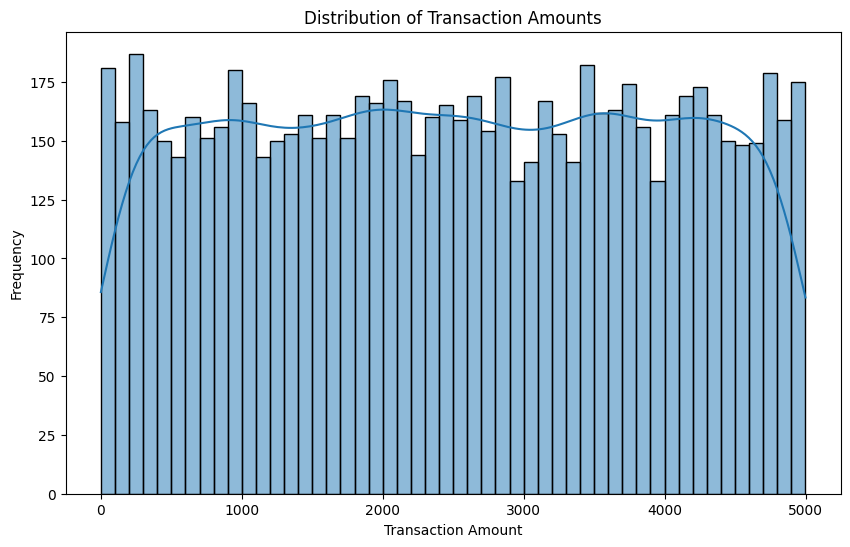

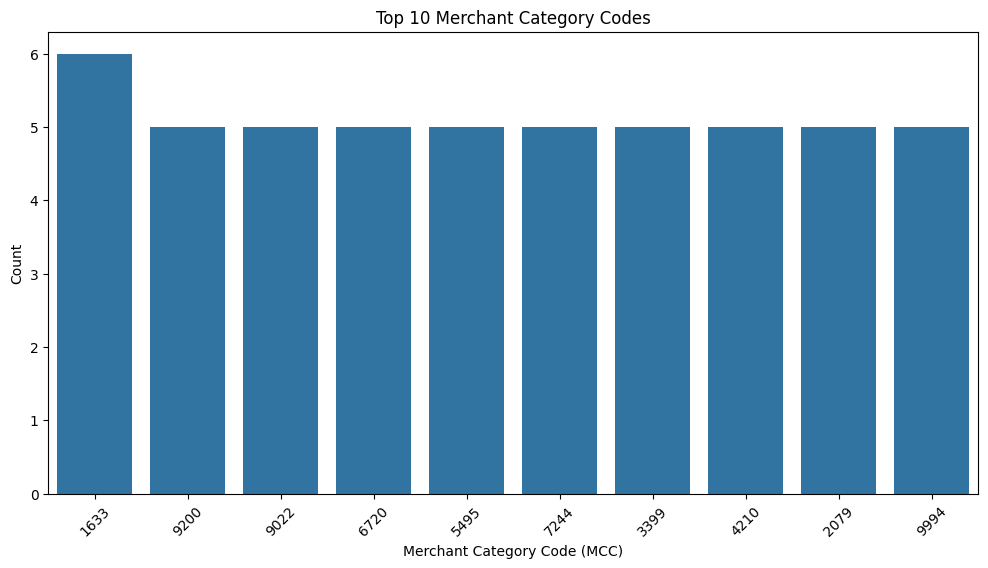

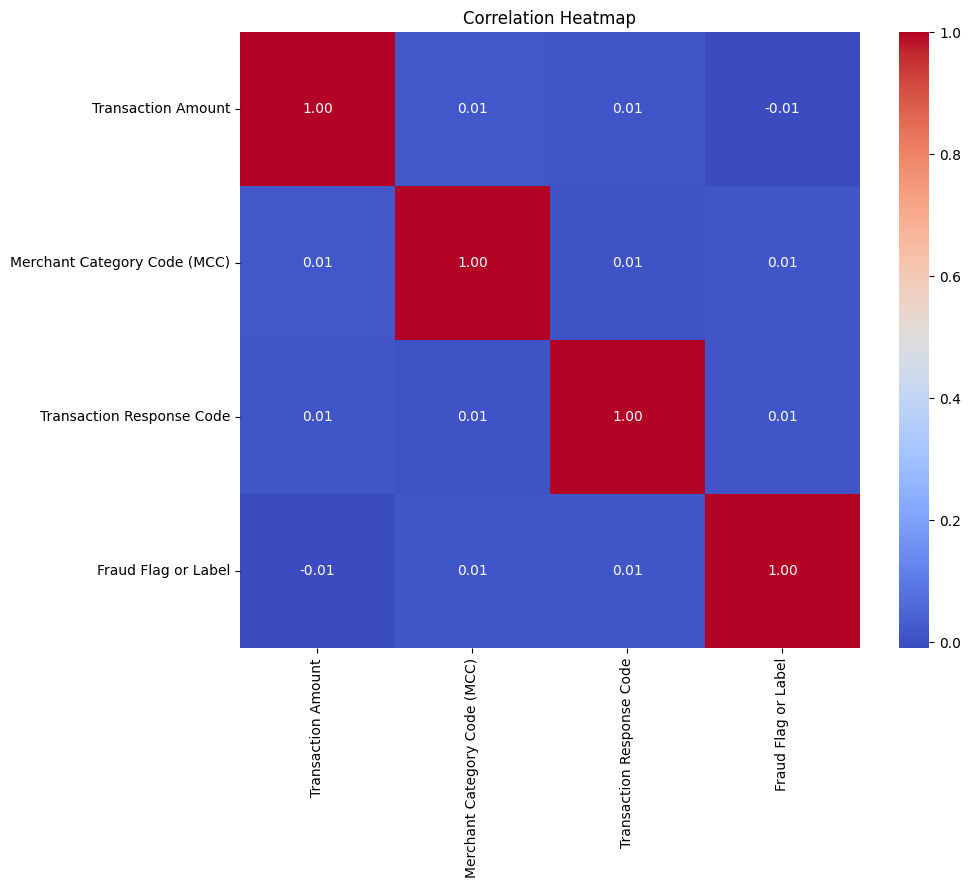

/var/folders/k6/nwkjrfg95fz6d9mmkjsfvxhr0000gn/T/ipykernel_2936/1680561602.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/var/folders/k6/nwkjrfg95fz6d9mmkjsfvxhr0000gn/T/ipykernel_2936/1680561602.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Transaction Date and Time: 8000 unique values
Transaction Amount: 7934 unique values
Cardholder Name: 7651 unique values
Card Number (Hashed or Encrypted): 8000 unique values
Merchant Name: 7027 unique values
Merchant Category Code (MCC): 5328 unique values
Transaction Location (City or ZIP Code): 316 unique values
Transaction Currency: 3 unique values
Card Type: 3 unique values
Card Expiration Date: 121 unique values
CVV Code (Hashed or Encrypted): 1000 unique values
Transaction Response Code: 3 unique values
Transaction ID: 8000 unique values
Fraud Flag or Label: 2 unique values
Previous Transactions: 3 unique values
Transaction Source: 2 unique values
IP Address: 8000 unique values
Device Information: 3 unique values
User Account Information: 3918 unique values
Transaction Notes: 8000 unique values
Transaction Location column not found, removing from categorical columns

Preprocessed Data:
  Transaction Date and Time  Transaction Amount  Cardholder Name  \
0       2022-09-24 13:54:2

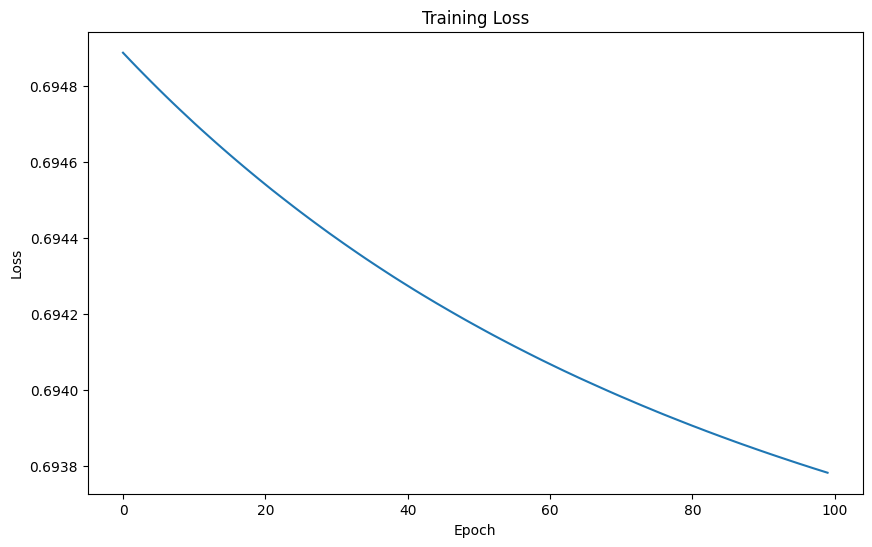

Accuracy: 0.5100

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.12      0.19       786
         1.0       0.51      0.89      0.65       814

    accuracy                           0.51      1600
   macro avg       0.51      0.50      0.42      1600
weighted avg       0.51      0.51      0.42      1600



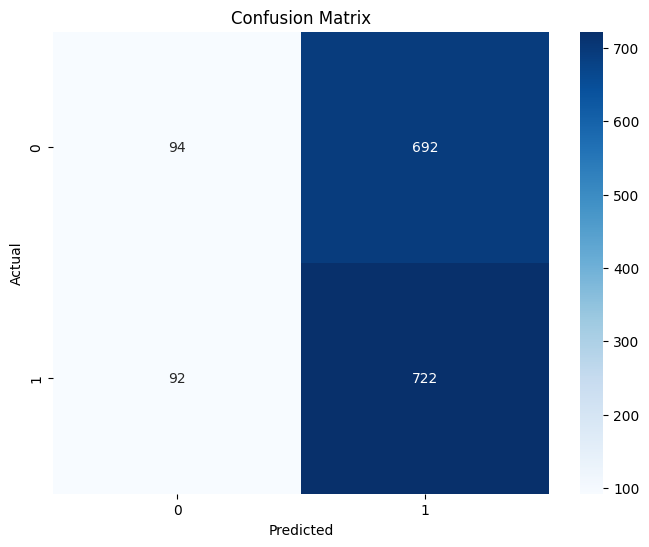

ROC AUC: 0.5099


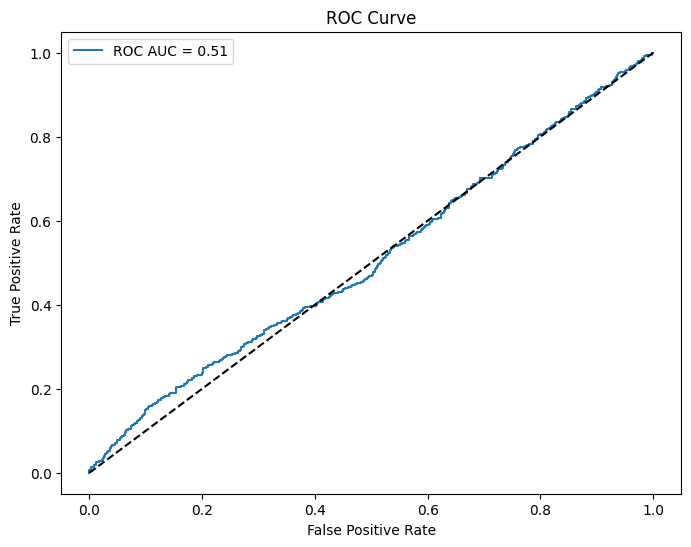


Fraud Detection Results:
   Actual  Predicted  Correct
0     0.0        1.0    False
1     0.0        0.0     True
2     0.0        0.0     True
3     1.0        0.0    False
4     0.0        1.0    False

Correct Fraud Predictions:
    Actual  Predicted  Correct
7      1.0        1.0     True
9      1.0        1.0     True
11     1.0        1.0     True
14     1.0        1.0     True
15     1.0        1.0     True

Incorrect Fraud Predictions:
     Actual  Predicted  Correct
3       1.0        0.0    False
28      1.0        0.0    False
52      1.0        0.0    False
60      1.0        0.0    False
121     1.0        0.0    False


In [7]:

## Credit Card Fraud Detection using PyTorch

### Project Overview

# This project focuses on detecting fraudulent credit card transactions using a neural network model implemented in PyTorch. The goal is to build a model that can accurately identify fraudulent transactions from a dataset containing transaction details such as amount, cardholder information, merchant details, and location.

### 1. Data Loading and Exploration


# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the data from the CSV file

df = pd.read_csv('credit_card_fraud.csv')  # Replace with your actual filename

# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
print(df.head())

# Summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
print(df.describe())

# Information about the dataframe (data types, missing values)
print("\nInformation about the dataframe:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


### 2. Data Visualization
# Visualizing the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of Merchant Category Code (MCC)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Merchant Category Code (MCC)', order = df['Merchant Category Code (MCC)'].value_counts().iloc[:10].index)
plt.title('Top 10 Merchant Category Codes')
plt.xlabel('Merchant Category Code (MCC)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap (if there are numerical features that are not identifiers)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if len(numerical_cols) > 1:
    corr = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numerical columns to display correlation heatmap.")

### 3. Data Preprocessing
# Handle missing values (if any) - Impute with mean for numerical columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Handle categorical columns by filling with mode
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # Use mode for imputation

# Display the count of unique values in each column
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique values')

# Corrected list of categorical columns to encode
categorical_cols = [
    'Cardholder Name',
    'Merchant Name',
    'Merchant Category Code (MCC)',
    'Transaction Location (City or ZI'  # Corrected column name
]
#check if transaction location exists in df. if not, remove it from categorical cols
if 'Transaction Location (City or ZI' not in df.columns:
    categorical_cols.remove('Transaction Location (City or ZI')
    print("Transaction Location column not found, removing from categorical columns")

# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Scale numerical features
numerical_cols = ['Transaction Amount'] + categorical_cols  # Include encoded categorical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the preprocessed data
print("\nPreprocessed Data:")
print(df.head())


# Prepare the data for PyTorch

# Assuming you have a 'Fraud' column (you'll need to create or load this)
# For demonstration, let's add a dummy 'Fraud' column with random values
df['Fraud'] = np.random.randint(0, 2, df.shape[0])  # 0 or 1 randomly

# Convert dataframe to numpy arrays
X = df[numerical_cols].values
y = df['Fraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


### 4. Model Design (PyTorch)
# Define the neural network model
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size):
        super(FraudDetectionModel, self).__init__()
        self.linear1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(64, 32)  # Corrected input size to 64
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out) # Pass the output of the previous layer
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.sigmoid(out)
        return out

# Initialize the model
input_size = X_train.shape[1]
model = FraudDetectionModel(input_size)


### 5. Model Training
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### 6. Model Evaluation
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    accuracy = accuracy_score(y_test, y_predicted_cls)
    print(f'Accuracy: {accuracy:.4f}')

    # Classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_predicted_cls))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_predicted_cls)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_predicted)
    print(f'ROC AUC: {roc_auc:.4f}')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


### 7. Fraud Detection and Analysis
# Fraud Detection
model.eval()
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()

# Analyze the predicted results
fraud_results = pd.DataFrame({'Actual': y_test.flatten().numpy(), 'Predicted': y_predicted_cls.flatten().numpy()})
fraud_results['Correct'] = fraud_results['Actual'] == fraud_results['Predicted']

print("\nFraud Detection Results:")
print(fraud_results.head())

# Analyze fraud predictions
correct_fraud_predictions = fraud_results[(fraud_results['Actual'] == 1) & (fraud_results['Correct'] == True)]
incorrect_fraud_predictions = fraud_results[(fraud_results['Actual'] == 1) & (fraud_results['Correct'] == False)]

print("\nCorrect Fraud Predictions:")
print(correct_fraud_predictions.head())

print("\nIncorrect Fraud Predictions:")
print(incorrect_fraud_predictions.head())
